In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.graphics.gofplots import qqplot
from numpy.linalg import pinv
from joblib import dump

/var/folders/t_/0sss_n354p10j1d1j41c4ml00000gn/T/ipykernel_30419/3680305265.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('./data/processed_scraped_apartment_sales_baseline.csv')

df.head()

,Unnamed: 0,number_of_rooms,area_size,has_elevator,year_built,annual_fee_sek,annual_cost_sek,region_processed_bromma,region_processed_centrala sundbyberg,region_processed_gröndal,...,region_processed_östermalm,has_balcony_nej,has_balcony_unknown,cleaned_floor_number,brokerage_firm_processed_erik olsson fastighetsförmedling,brokerage_firm_processed_fastighetsbyrån stockholm - södermalm,brokerage_firm_processed_länsförsäkringar fastighetsförmedling solna,brokerage_firm_processed_notar,brokerage_firm_processed_tradition mäkleri,price_sold_sek
0,0,3.0,74,False,1953.0,4899,9000,False,False,False,...,False,False,False,2.0,False,False,False,False,False,4400000
1,1,1.0,25,True,1961.0,2265,3120,False,False,False,...,False,False,True,4.0,False,False,False,False,False,1015000
2,3,1.0,40,True,1955.0,3250,4500,False,False,False,...,False,False,False,2.0,False,False,False,False,False,1395000
3,4,1.0,31,True,1963.0,1290,6804,False,False,False,...,False,False,False,1.0,False,False,False,True,False,3150000
4,5,1.0,40,True,1972.0,2947,4200,False,False,False,...,False,False,False,1.0,False,False,False,False,False,1750000


In [3]:
df = df.drop('Unnamed: 0', axis=1)

## *1. Split Data*

In [4]:
X = df.drop('price_sold_sek', axis=1)
y = df['price_sold_sek']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

## *2. Build Model*

In [6]:
baseline_model = LinearRegression()

In [7]:
baseline_model.fit(X_train, y_train)

LinearRegression()

## *3. Make Predictions*

In [8]:
predictions = baseline_model.predict(X_test)

## *4. Evaluate Model*

In [9]:
# Various performance metrics
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse} \nRMSE: {rmse} \nMAE: {mae} \nR-squared: {r2}")

MSE: 3404845047266.328 
RMSE: 1845222.2216487445 
MAE: 1363035.2040760939 
R-squared: 0.5441301212408783


/Users/ossianhempel/repos/apartment_price_predictor/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
# Calculating the variables coefficients
coefficients = baseline_model.coef_

feature_names = X.columns 
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

number_of_rooms: 1482091.2121018292
area_size: -118.20036852638297
has_elevator: 43091.755537457044
year_built: -10634.519074534544
annual_fee_sek: -98.23984086070736
annual_cost_sek: 65.60234004550556
region_processed_bromma: 171022.8912187812
region_processed_centrala sundbyberg: 734191.8011815711
region_processed_gröndal: 1567778.0390767055
region_processed_hammarby sjöstad: 2103233.9287252463
region_processed_kungsholmen: 2301057.811705629
region_processed_råsunda: 343375.1439734252
region_processed_södermalm: 2086233.2258192992
region_processed_vasastan: 2972906.6935907165
region_processed_årsta: -1758.1878116072442
region_processed_östermalm: 5866960.02136185
has_balcony_nej: 50467.28567449463
has_balcony_unknown: -293019.10252813005
cleaned_floor_number: 91648.75587525952
brokerage_firm_processed_erik olsson fastighetsförmedling: 460781.5962591038
brokerage_firm_processed_fastighetsbyrån stockholm - södermalm: 1988702.8638562213
brokerage_firm_processed_länsförsäkringar fastighe

## *5. Evaluate Assumptions*

In [11]:
residuals = y_test - predictions

#### Normality

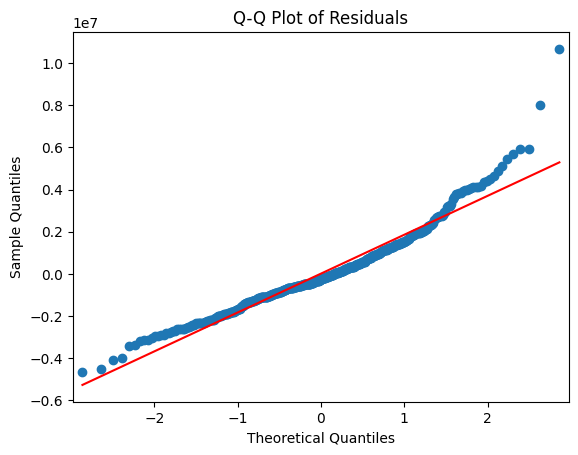

In [12]:
qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

#### Homoscedasticity & Linearity & Independence

In [13]:
fig = px.scatter(x=predictions, y=residuals, labels={'x':'Predicted Values', 'y':'Residuals'})
fig.update_layout(title='Residuals vs Predicted Values', xaxis_title='Predicted Values', yaxis_title='Residuals')
# Add a horizontal line at residuals = 0
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.show()

The spread of residuals is wider for larger predicted values which could be an indication of heterodescedasticity. There's a slight cone shape.

To statistically confirm these visual insights, you could perform additional tests, such as the Breusch-Pagan test or White's test, which are designed to detect heteroscedasticity. If heteroscedasticity is present, you might consider using weighted least squares (WLS) or other forms of heteroscedasticity-consistent standard errors to account for it.








#### Outliers (Cook's Distance)

In [14]:
def cooks_distance(X, y):
    # Add intercept term to X
    X_intercept = np.hstack([np.ones((X.shape[0], 1)), X.astype(int)])  # Ensure X is numeric

    # Fit the model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_intercept, y)
    
    # Get predictions and residuals
    predictions = model.predict(X_intercept)
    residuals = y - predictions
    
    # Calculate MSE
    mse = np.mean(residuals**2)
    
    # Leverage (using pseudo-inverse)
    H = X_intercept @ pinv(X_intercept.T @ X_intercept) @ X_intercept.T
    h_ii = np.diag(H)
    
    # Cook's Distance
    p = X_intercept.shape[1]
    cooks_d = (residuals**2 / (p * mse)) * (h_ii / (1 - h_ii)**2)

    # Identify influential points
    n = X.shape[0]
    threshold = 4 / n
    influential_points = np.where(cooks_d > threshold)[0]

    return cooks_d, influential_points

cooks_d, influential_points = cooks_distance(X_train, y_train)

# Print out the rows that are outliers
print("Influential Points (Outliers):")
print(influential_points)


Influential Points (Outliers):
[   5   10   62   71   75   79   82   86   99  116  142  144  158  174
  211  225  232  299  348  357  384  385  387  400  437  454  537  548
  636  638  651  675  681  700  708  726  727  728  785  839  840  843
  850  875  910  911  918  935  941  945  964  983  990 1003 1017 1039
 1051 1062 1078 1081 1098 1120 1123 1125 1128 1133 1138 1140 1147 1152
 1158 1187 1202 1204 1226 1240 1277 1278 1281 1287 1331 1375]


In [15]:
X_train.iloc[influential_points]


,number_of_rooms,area_size,has_elevator,year_built,annual_fee_sek,annual_cost_sek,region_processed_bromma,region_processed_centrala sundbyberg,region_processed_gröndal,region_processed_hammarby sjöstad,...,region_processed_årsta,region_processed_östermalm,has_balcony_nej,has_balcony_unknown,cleaned_floor_number,brokerage_firm_processed_erik olsson fastighetsförmedling,brokerage_firm_processed_fastighetsbyrån stockholm - södermalm,brokerage_firm_processed_länsförsäkringar fastighetsförmedling solna,brokerage_firm_processed_notar,brokerage_firm_processed_tradition mäkleri
1360,2.0,44,False,1929.0,1950,0,False,False,False,False,...,False,True,False,True,1.0,False,False,False,False,False
1696,3.0,682,False,1897.0,4152,24600,False,False,False,False,...,False,False,False,True,0.0,False,False,False,False,False
168,3.0,86,True,1967.0,4320,0,False,False,False,False,...,False,False,False,False,2.0,False,True,False,False,False
1334,4.0,89,False,1964.0,5712,4800,False,False,False,False,...,False,False,False,False,3.0,False,False,False,False,False
910,2.0,32,True,1939.0,0,5735,False,False,False,False,...,False,True,False,False,1.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2.0,41,True,1939.0,2900,4700,False,False,False,False,...,False,True,False,False,1.0,False,False,False,False,False
1436,2.0,39,True,1928.0,2545,3120,False,False,False,False,...,False,False,False,False,4.0,False,False,False,False,True
1860,1.0,28,False,1942.0,628,7800,False,False,False,False,...,False,True,False,True,1.0,False,False,False,False,False
653,3.0,88,True,2013.0,4214,6000,False,False,False,False,...,False,False,False,False,8.0,True,False,False,False,False


## *6. Save Baseline Model*

In [16]:
dump(baseline_model, '../src/models/baseline_model.joblib')

['../src/models/baseline_model.joblib']